## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

For this analysis, I wanted to focus on people's happiness and how different aspects of their lives correlate with it. Some of these seem more obvious than others: it's not unreasonable to expect that health would be positively correlated with happiness, for instance. But does education level correlate in the same way? What about time spent on the internet?

I tried to pick a variety of variables from different facets of a person's life: their job, family, religion... The goal is to see if any of these (seemingly) unrelated variables actually have a closer connection than expected.

In [18]:
import pandas as pd
import numpy as np

# load 2022 GSS
df = pd.read_excel("GSS.xlsx")
df.head()

# CLEAN

# educ -> education level; remove invalid values
df["educ"] = df["educ"].replace([".n:  No answer"], np.nan)
# happy -> happiness; remove invalid values
df["happy"] = df["happy"].replace([".i:  Inapplicable", ".s:  Skipped on Web", ".n:  No answer", ".d:  Do not Know/Cannot Choose"], np.nan)
# wwwhr -> number of hours spent on internet; remove invalid values and make it numeric
df["wwwhr"] = pd.to_numeric(df["wwwhr"].replace([".i:  Inapplicable", ".n:  No answer", ".d:  Do not Know/Cannot Choose"], np.nan).replace("0 hours", 0), errors="coerce")
# wwwmin -> number of minutes spent on internet; remove invalid values and make it numeric
df["wwwmin"] = pd.to_numeric(df["wwwmin"].replace([".i:  Inapplicable", ".n:  No answer", ".d:  Do not Know/Cannot Choose"], np.nan).replace("0 minutes", 0), errors="coerce")
# polviews -> political views; remove invalid values
df["polviews"] = df["polviews"].replace([".i:  Inapplicable", ".s:  Skipped on Web", ".n:  No answer", ".d:  Do not Know/Cannot Choose"], np.nan)
# wealth -> wealth in brackets; remove invalid values
df["wealth"] = df["wealth"].replace([".i:  Inapplicable", ".s:  Skipped on Web", ".n:  No answer", ".d:  Do not Know/Cannot Choose"], np.nan)
# reliten -> religious intensity; remove invalid values
df["reliten"] = df["reliten"].replace([".i:  Inapplicable", ".s:  Skipped on Web", ".n:  No answer", ".d:  Do not Know/Cannot Choose"], np.nan)
# hrs2 -> number of hours worked a week; remove invalid values and make it numeric
df["hrs2"] = pd.to_numeric(df["hrs2"].replace([".i:  Inapplicable", ".s:  Skipped on Web", ".n:  No answer", ".d:  Do not Know/Cannot Choose"], np.nan), errors="coerce")
# satfin -> satisfaction with financial situation; remove invalid values
df["satfin"] = df["satfin"].replace([".i:  Inapplicable", ".s:  Skipped on Web", ".n:  No answer", ".d:  Do not Know/Cannot Choose"], np.nan)
# wkvsfam -> work vs family; remove invalid values
df["wkvsfam"] = df["wkvsfam"].replace([".i:  Inapplicable", ".s:  Skipped on Web", ".n:  No answer", ".d:  Do not Know/Cannot Choose"], np.nan)
# health -> health; remove invalid values
df["health"] = df["health"].replace([".i:  Inapplicable", ".s:  Skipped on Web", ".n:  No answer", ".d:  Do not Know/Cannot Choose"], np.nan)

# MUTATE
# NOTE: in many of these cases, I diverged from the codebook when assigning numeric values
# this is because I wanted to sort the values from least to most for ease of analysis

# www -> total time spent on internet (hours); sum of wwwhr and wwwmin / 60
# chose to save in hours rather than minutes since hrs2 is in hours
df["time_on_internet"] = df["wwwhr"] + df["wwwmin"] / 60
# years_schooling -> numeric version of educ
EDUC_MAP = {'No formal schooling': 0, '1st grade': 1, '2nd grade': 2, '3rd grade': 3, '4th grade': 4, '5th grade': 5, '6th grade': 6, '7th grade': 7, '8th grade': 8, '9th grade': 9, '10th grade': 10, '11th grade': 11, '12th grade': 12, '1 year of college': 13, '2 years of college': 14, '3 years of college': 15, '4 years of college': 16, '5 years of college': 17, '6 years of college': 18, '7 years of college': 19, '8 or more years of college': 20}
df["years_schooling"] = df["educ"].replace(EDUC_MAP)
# weekly_hours_worked -> hrs2
df["weekly_hours_worked"] = df["hrs2"]
# health_numeric -> numeric version of health from least to most
HEALTH_MAP = {"Excellent": 4, "Good": 3, "Fair": 2, "Poor": 1}
df["health_numeric"] = df["health"].replace(HEALTH_MAP)
# happy_numeric -> numeric version of happiness, from least to most
HAPPY_MAP = {"Very happy": 3, "Pretty happy": 2, "Not too happy": 1}
df["happy_numeric"] = df["happy"].replace(HAPPY_MAP)
# polviews_numeric -> numeric version of political views based on codes from codebook
POLVIEWS_MAP = {"Extremely liberal": 1, "Liberal": 2, "Slightly liberal": 3, "Moderate, middle of the road": 4, "Slightly conservative": 5, "Conservative": 6, "Extremely conservative": 7}
df["polviews_numeric"] = df["polviews"].replace(POLVIEWS_MAP)
# wealth_numeric -> minimum value of each wealth bracket
# it's technically categorical but we can make it "numeric" by taking the minimum value of each bracket
# I picked the minimum since every person in the bracket makes at least that much (while most people in the bracket won't make the maximum, and many won't even make the average)
# The "less than $5000" bracket is assigned 1 instead of 0 so that we can do log calculations
WEALTH_MAP = {"Less than $5,000": 1, "$5,000 to $20,000": 5000, "$20,000 to $40,000": 20000, "$40,000 to $75,000": 40000, "$75,000 to $100,000": 75000, "$100,000 to $150,000": 100000, "$150,000 to $250,000": 150000, "$250,000 to $500,000": 250000, "$500,000 to $1 million": 500000, "$1 million to $2 million": 1000000, "$2 million to $3 million": 2000000, "$3 million to $4 million": 3000000, "$4 million to $5 million": 4000000, "$5 million to $10 million": 5000000, "Above $10 million": 10000000}
df["wealth_numeric"] = df["wealth"].replace(WEALTH_MAP)
# reliten_numeric -> numeric version of religious intensity from least to most
RELITEN_MAP = {"Not very strong": 1, "Somewhat strong (Vol.)": 2, "Strong": 3, "No religion": np.nan}
df["reliten_numeric"] = df["reliten"].replace(RELITEN_MAP)
# satfin_numeric -> numeric version of satisfaction with financial situation from least to most
SATFIN_MAP = {"Pretty well satisfied": 3, "More or less satisfied": 2, "Not satisfied at all": 1}
df["satfin_numeric"] = df["satfin"].replace(SATFIN_MAP)
# job_demands -> numeric version of wkvsfam from least to most
JOB_DEMANDS_MAP = {"Often": 4, "Sometimes": 3, "Rarely": 2, "Never": 1}
df["job_demands"] = df["wkvsfam"].replace(JOB_DEMANDS_MAP)

print(df.dtypes)

year                     int64
id_                      int64
hrs2                   float64
educ                    object
polviews                object
reliten                 object
happy                   object
health                  object
satfin                  object
wwwhr                  float64
wwwmin                 float64
wkvsfam                 object
wealth                  object
ballot                  object
time_on_internet       float64
years_schooling        float64
weekly_hours_worked    float64
health_numeric         float64
happy_numeric          float64
polviews_numeric       float64
wealth_numeric         float64
reliten_numeric        float64
satfin_numeric         float64
job_demands            float64
dtype: object


/tmp/ipykernel_941760/2282909241.py:42: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["years_schooling"] = df["educ"].replace(EDUC_MAP)
/tmp/ipykernel_941760/2282909241.py:47: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["health_numeric"] = df["health"].replace(HEALTH_MAP)
/tmp/ipykernel_941760/2282909241.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavio

<Axes: >

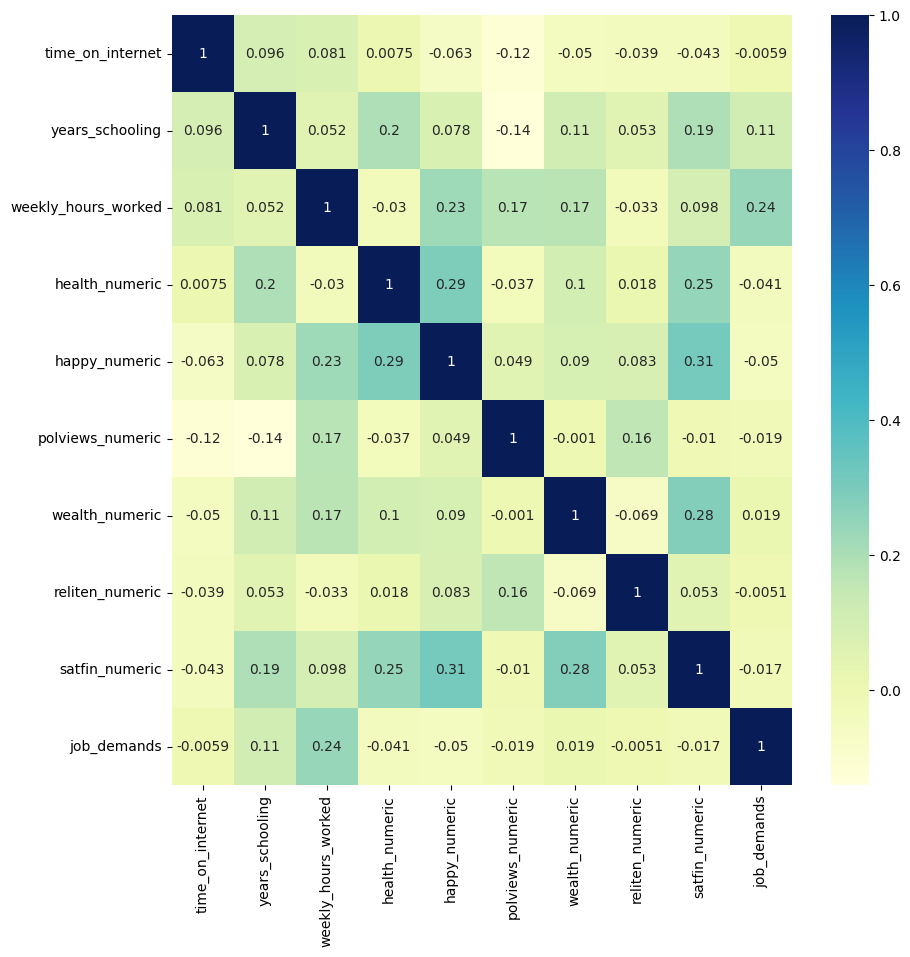

In [19]:
# HEAT MAP
import seaborn as sns
import matplotlib.pyplot as plt

# the actually relevant columns of our dataframe
df2 = df[["time_on_internet", "years_schooling", "weekly_hours_worked", "health_numeric", "happy_numeric", "polviews_numeric", "wealth_numeric", "reliten_numeric", "satfin_numeric", "job_demands"]]

corr = df2.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")

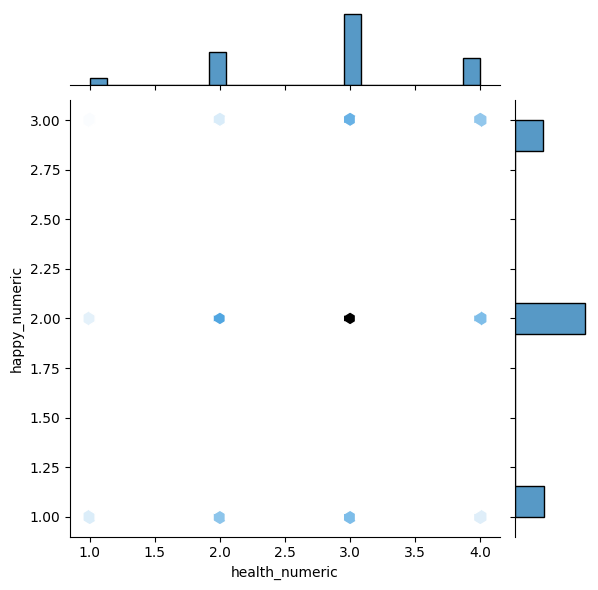

In [20]:
# Joint plot -- health vs. happiness
# Are healthier people happier?

sns.jointplot(data=df, x="health_numeric", y="happy_numeric", kind="hex")
# seems like most people are in good health and somewhat happy
# there are a few people in excellent health who are quite unhappy
# there aren't really any people in poor health who are very happy

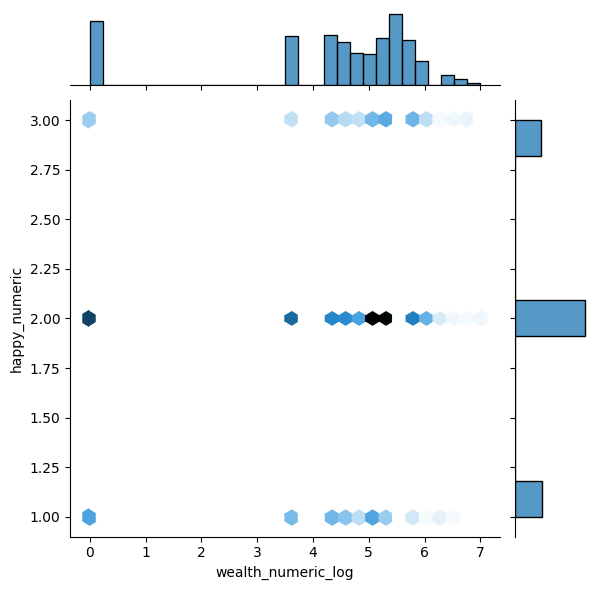

In [21]:
# Joint plot -- wealth vs. happiness
# Are rich people happier?
# Since wealth is so skewed, we take the log10

df["wealth_numeric_log"] = np.log10(df["wealth_numeric"])
sns.jointplot(data=df, x="wealth_numeric_log", y="happy_numeric", kind="hex")
# the bulk of people have a wealth in the low 6 figures and are somewhat happy
# there is a group of people who are somewhat happy and have little to no wealth -- who are these people? college students?
# the distributions of wealth between the very happy and unhappy groups are very similar, which is interesting
# more unhappy people than happy people across the board

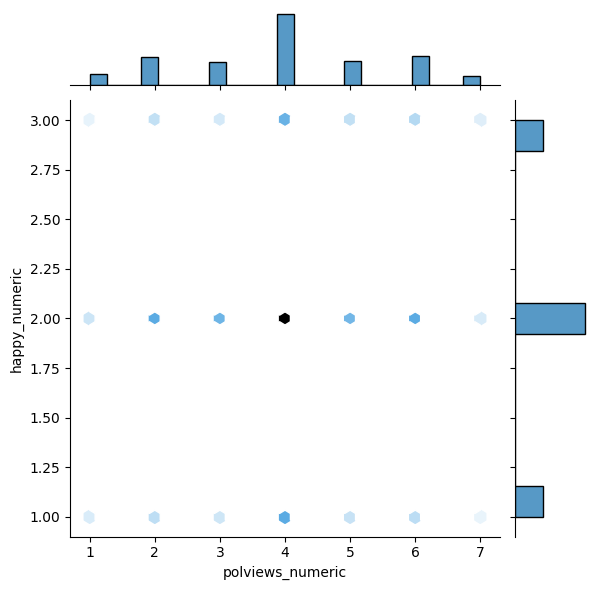

In [22]:
# Joint plot -- political views vs. happiness
# Important to note: this survey was conducted in 2022, during the Biden administration
# Would a 2025 one under the Trump administration look different?

sns.jointplot(data=df, x="polviews_numeric", y="happy_numeric", kind="hex")
# this is actually *very* evenly distributed...

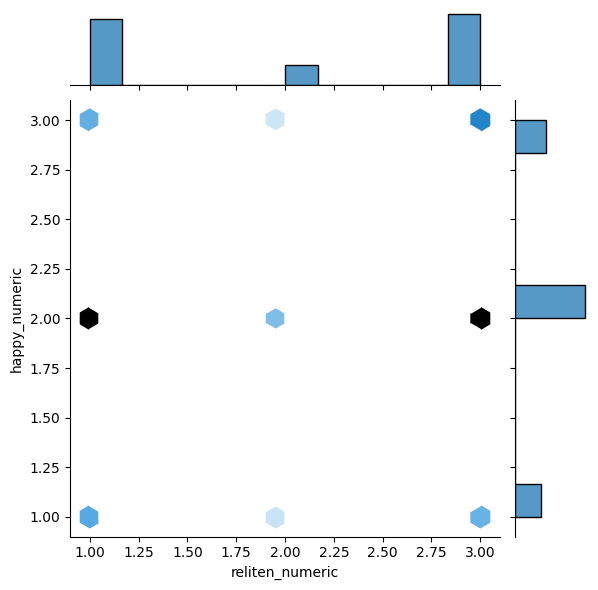

In [23]:
# Joint plot -- religious intensity vs. happiness
# Are more religious people happier?

sns.jointplot(data=df, x="reliten_numeric", y="happy_numeric", kind="hex")
# the greatest group of people fall into one of two buckets:
# not very religious and somewhat happy
# very religious and somewhat happy
# there are not as many people in the middle, though that might be a result of people considering themselves one or the other

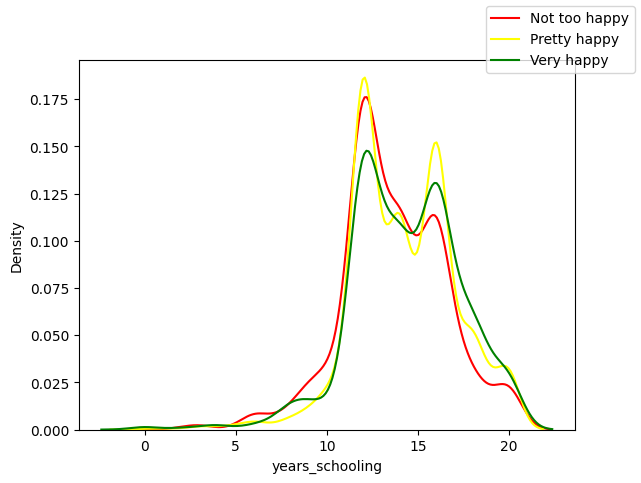

In [24]:
# Density plots -- education level vs. happiness
# Are more educated people happier?

fig = plt.figure()
sns.kdeplot(data=df[df["happy_numeric"] == 1], x="years_schooling", color="red", fill=False)
sns.kdeplot(data=df[df["happy_numeric"] == 2], x="years_schooling", color="yellow", fill=False)
sns.kdeplot(data=df[df["happy_numeric"] == 3], x="years_schooling", color="green", fill=False)
fig.legend(labels=list(sorted(HAPPY_MAP.keys(), key=lambda x: HAPPY_MAP[x])))
# higher peak of unhappy people at 12 (high school graduate), higher peak of very happy people at 16 (college graduate)
# from 16 onwards, there is a higher density of very happy people than unhappy people
# somewhat happy still beats both, though

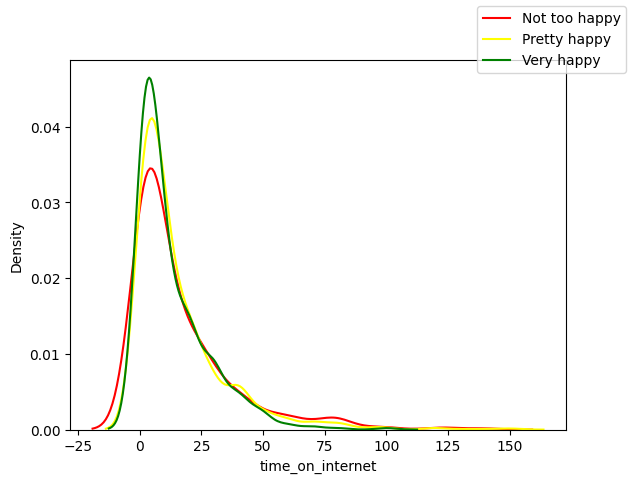

In [25]:
# Density plots -- time on internet vs. happiness
# Do happier people spend more time on the internet?

fig = plt.figure()
sns.kdeplot(data=df[df["happy_numeric"] == 1], x="time_on_internet", color="red", fill=False)
sns.kdeplot(data=df[df["happy_numeric"] == 2], x="time_on_internet", color="yellow", fill=False)
sns.kdeplot(data=df[df["happy_numeric"] == 3], x="time_on_internet", color="green", fill=False)
fig.legend(labels=list(sorted(HAPPY_MAP.keys(), key=lambda x: HAPPY_MAP[x])))
# very happy people (green) have a higher peak than the other groups
# we can see the differences more past 50 hours -- unhappy people (red) have a higher density than somewhat happy (yellow) or very happy (green) people
# it seems like the happiest people spend less time on the internet

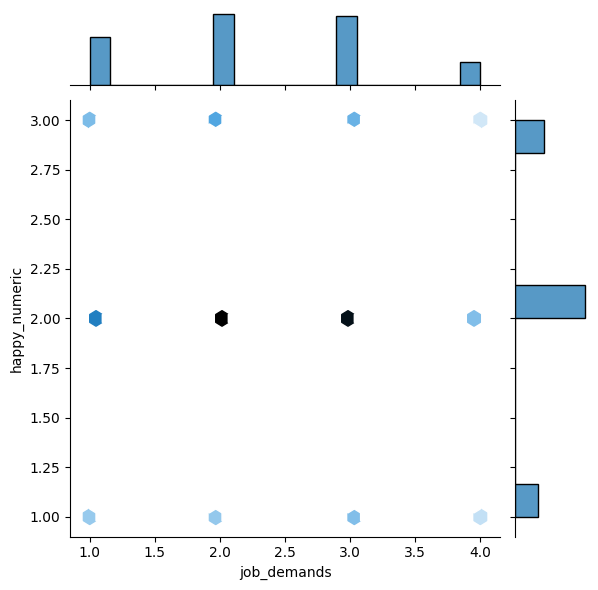

In [26]:
# Joint plot -- job demands vs. happiness
# Do people whose jobs demand more time (and less time with family) tend to be happier?

sns.jointplot(data=df, x="job_demands", y="happy_numeric", kind="hex")
# this seems to be fairly even across happiness levels; slight negative correlation

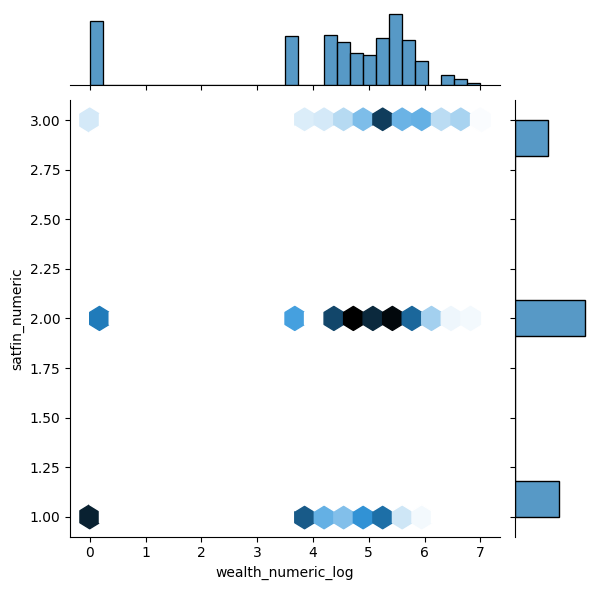

In [27]:
# Joint plot -- wealth vs. financial satisfaction
# Are wealthier people more satisfied with their financial situation?

sns.jointplot(data=df, x="wealth_numeric_log", y="satfin_numeric", kind="hex")
# it does seem like satfin_numeric = 1 has more people with lower wealth than satfin_numeric = 3

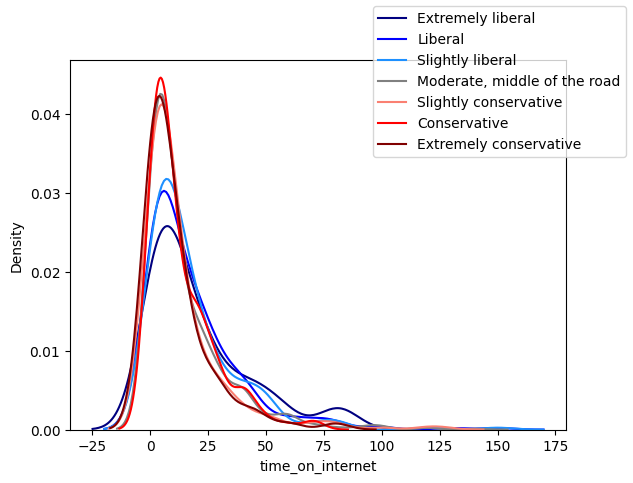

In [28]:
# Density plots -- time on internet vs. political views
# Do more politically extreme people spend more time on the internet?

fig = plt.figure()
sns.kdeplot(data=df[df["polviews_numeric"] == 1], x="time_on_internet", color="navy", fill=False)
sns.kdeplot(data=df[df["polviews_numeric"] == 2], x="time_on_internet", color="blue", fill=False)
sns.kdeplot(data=df[df["polviews_numeric"] == 3], x="time_on_internet", color="dodgerblue", fill=False)
sns.kdeplot(data=df[df["polviews_numeric"] == 4], x="time_on_internet", color="gray", fill=False)
sns.kdeplot(data=df[df["polviews_numeric"] == 5], x="time_on_internet", color="salmon", fill=False)
sns.kdeplot(data=df[df["polviews_numeric"] == 6], x="time_on_internet", color="red", fill=False)
sns.kdeplot(data=df[df["polviews_numeric"] == 7], x="time_on_internet", color="maroon", fill=False)
fig.legend(labels=list(sorted(POLVIEWS_MAP.keys(), key=lambda x: POLVIEWS_MAP[x])))
# it seems like time on the internet is positively correlated with how liberal you identify as


The primary goal of this analysis was to determine if any variables about a person's life correlate with their happiness. To that end, I started out with a correlation matrix between all the different variables, and I focused specifically on the `happy_numeric` column and row. This didn't really tell me anything useful. At best, it showed a small positive correlation between health and happiness. From there, I decided to look more closely by comparing each individual variable against happiness.

I used joint plots for most of these since we are essentially comparing two categorical variables with very few values against each other. Most of these variables only had three or four possible variables, so a visualization that worked over a continuous distribution wouldn't be a good fit. At the same time, we're comparing the frequency of specific combinations of the two variables, and the use of color in the joint plot makes it easy to see when one combination is more frequent than another. With these plots, I wanted to see if there was a frequency increase between the bottom left and top right (indicating a positive correlation) or the top left and bottom right (indicating a negative correlation).

For a couple variables -- specifically, the log of wealth and years of schooling -- there are a good number of different values, so it's close enough to a continuous variable that I decided to use density plots. In these cases, I made a plot for each distinct happiness value. With these plots, a positive correlation is reflected by the higher-happiness plots having a greater density at higher values of the other variables than the lower-happiness plots. Time on the internet is actually a continuous distribution, so I used the density plot there as well.

Here are my findings:

* **Are healthier people happier?** Yes. There are more unhappy people in poor health than very happy people in poor health, and more very happy people in excellent health than unhappy people in excellent health.
* **Are wealthier people happier?** Maybe a little, but not much. The distribution appears to be fairly even across happiness levels, though there are more very wealthy people who are also very happy than very wealthy, unhappy people.
* **Are people of a specific political persuasion happier?** Nope. This distribution is basically perfectly symmetrical, indicating that happiness is relatively independent of politics. (Note that the presidential administration has changed since the 2022 GSS, which may affect how this plot would look with 2025 data.)
* **Are more intensely religious people happier?** Not really. There is a slight difference between (very religious, very happy) and (very religious, not very happy), but the distribution is pretty even besides that.
* **Are more educated people happier?** A bit. It seems like there are more very happy people than unhappy people with at least a college education.
* **Are people who spend more time on the internet happier?** The plot suggests that very happy people actually spend less time on the internet. This phenomenon is more noticeable past 50 hours a week, with the highest density of unhappy people followed by somewhat happy people.
* **Are people who spend more time at work happier?** No. There is a slight negative correlation between time at work and happiness.

I also looked at a couple other relationships not directly related to happiness:

* **Are wealthier people more satisfied with their financial situation?** Yes. There are more people with lower wealth and lower financial satisfaction than wealthy people with low financial satisfaction. There are also more people with high wealth and high financial satisfaction than people with low wealth and high financial satisfaction.
* **Do people who spend more time on the internet have a specific political persuasion?** Yes. At higher levels of internet usage, there is an increased density of more liberal views, indicating a correlation between time on the internet and liberal political opinions.